In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# 弱大数定律

https://en.wikipedia.org/wiki/Law_of_large_numbers#Differences_between_the_weak_law_and_the_strong_law
https://math.stackexchange.com/questions/2024255/what-is-the-difference-between-the-weak-and-strong-law-of-large-numbers
https://stats.stackexchange.com/questions/205496/intuition-behind-strong-vs-weak-laws-of-large-numbers-with-an-r-simulation
https://blog.csdn.net/luixiao1220/article/details/100170497 弱大数定律的例子不对, setting是均值序列, 而不是单个的随机变量.

## 均匀分布

In [41]:
np.random.seed(20220223)

In [42]:
# 均匀分布, 强弱大数定律都满足
n = 10000
M = 10000
sample = stats.uniform.rvs(0,1,size = (n,M))
numbers_of_rvs = np.arange(n)+1
sample_mean_series = np.apply_along_axis(lambda x: x/numbers_of_rvs, axis = 0, arr= sample.cumsum(axis = 0))

画出单个序列的样本均值走势图

(0.45, 0.55)

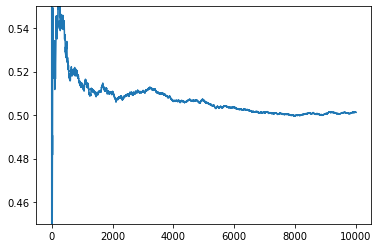

In [43]:
plt.plot(numbers_of_rvs, sample_mean_series[:,0])
plt.ylim(0.45,0.55)

指定一个界限eps, 根据10000条序列, 计算序列越过界限的概率. 这里我们用10000条序列的平均值计算概率序列, 因为样本有随机性, 所以图里面的线段在抖动. 但是, 我们可以看到概率序列正在收敛到1

In [44]:
eps = 0.02
mu = 0.5
prob_seq = (abs(sample_mean_series-mu)<eps).mean(axis = 1)

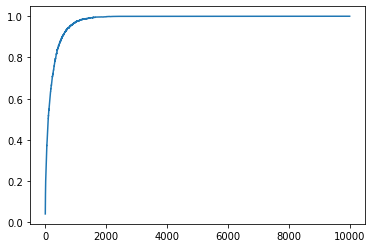

In [45]:
plt.plot(numbers_of_rvs, prob_seq)

## 特殊分布

In [72]:
# 均匀分布, 强弱大数定律都满足
n = 10000
M = 10000
sample = stats.expon.rvs(1,size = (n,M))
sample = np.sin(sample)*np.exp(sample)/sample
# sample = sample/sample.std()
numbers_of_rvs = np.arange(n)+1
sample_mean_series = np.apply_along_axis(lambda x: x/numbers_of_rvs, axis = 0, arr= sample.cumsum(axis = 0))

画出单个序列的样本均值走势图

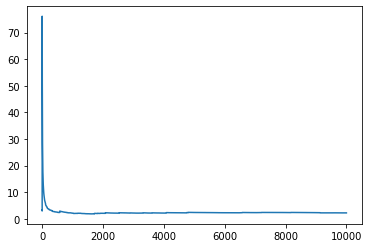

In [74]:
plt.plot(numbers_of_rvs, sample_mean_series[:,0])
# plt.ylim(sample_mean_series[-1,0] - 3*sample_mean_series[-1,:].std(),
#         sample_mean_series[-1,0] + 3*sample_mean_series[-1,:].std())

指定一个界限eps, 根据10000条序列, 计算序列越过界限的概率. 这里我们用10000条序列的平均值计算概率序列, 因为样本有随机性, 所以图里面的线段在抖动. 但是, 我们可以看到概率序列正在收敛到1

Text(0.5, 0.98, '$\\epsilon$ vs. Simulated Convergence Probability')

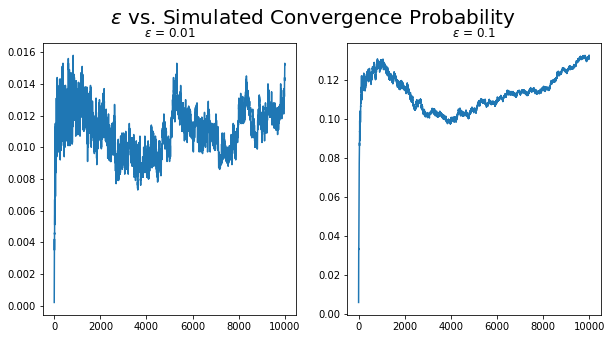

In [75]:
fig = plt.figure(figsize=(10,5))
# add fig 1
eps = 0.01
mu = np.pi/2
prob_seq = (abs(sample_mean_series-mu)<eps).mean(axis = 1)
fig.add_subplot(121, title="$\epsilon$ = 0.01")
plt.plot(numbers_of_rvs, prob_seq)
# add fig 2
eps = 0.1
mu = np.pi/2
prob_seq = (abs(sample_mean_series-mu)<eps).mean(axis = 1)
fig.add_subplot(122, title="$\epsilon$ = 0.1")
plt.plot(numbers_of_rvs, prob_seq)
# add super title
plt.suptitle('$\epsilon$ vs. Simulated Convergence Probability',fontsize=20)

# 强大数定律

## 均匀分布

先看10000条样本均值序列的收敛情况, 发现随机变量的值似乎经过某个点(样本量)之后, 序列就完全进入到一个领域内, 不再跳出了. 如果序列在某个点之后不再离开该领域, 这就是数学上的序列收敛定义了.事实上真的是这样吗? 

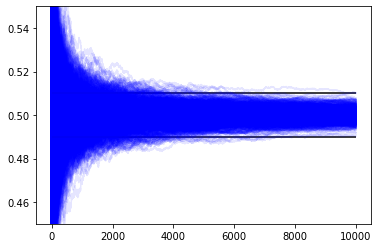

In [46]:
for i in range(1000):
# for i in range(10):
    plt.plot(numbers_of_rvs, sample_mean_series[:,i], color = 'blue',alpha =0.1)
plt.ylim(0.45,0.55)
plt.hlines(0.49, xmin = 1, xmax = numbers_of_rvs.max(),color = 'black')
plt.hlines(0.51, xmin = 1, xmax = numbers_of_rvs.max(),color = 'black')

我们按照强大数定律的定义, 来考察这件事情.定义事件A: 
$$\lim_{n \to \inf} |X_n-0.5| < \epsilon$$
不失一般性, 我们令$\epsilon = 0.01$. 我们观察事件A发生的概率如何, 我们借助10000条均值序列来估计事件A的发生概率.

In [47]:
eps = 0.02
mu = 0.5
boolean_mat = (sample_mean_series-mu)<eps
prob_est_strong = []
for start_point in numbers_of_rvs[::100]:
    prob_est_strong.append(boolean_mat[(start_point-1)::,].all(axis = 0).mean())
prob_est_strong = np.array(prob_est_strong)

(0.98, 1.01)

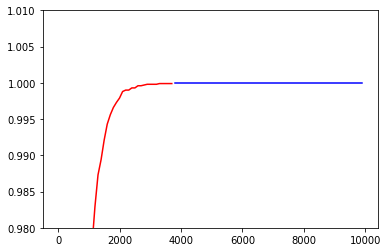

In [49]:
blue_index = np.where(np.array(prob_est_strong) == 1, True, False)
plt.plot(numbers_of_rvs[::100][blue_index], prob_est_strong[blue_index], color = 'blue')
plt.plot(numbers_of_rvs[::100][~blue_index], prob_est_strong[~blue_index], color = 'red')
plt.ylim(0.98,1.01)
# plt.hlines(y = 1, color = color_list, xmin = numbers_of_rvs[::100].min(), xmax = numbers_of_rvs[::100].max())

## 特殊分布

先看10000条样本均值序列的收敛情况, 发现随机变量的值似乎经过某个点(样本量)之后, 序列没有完全进入到一个领域内, 会存在一些次数的跳出. 跳出的次数仍然可以是无限次, 只要跳出的概率是0即可. 那么, 序列跳出领域的概率是0吗?

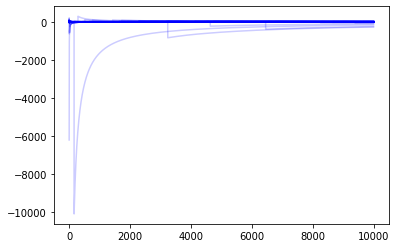

In [76]:
for i in range(1000):
# for i in range(10):
    plt.plot(numbers_of_rvs, sample_mean_series[:,i], color = 'blue',alpha =0.2)
# plt.ylim(0.45,0.55)
# plt.hlines(0.49, xmin = 1, xmax = numbers_of_rvs.max(),color = 'black')
# plt.hlines(0.51, xmin = 1, xmax = numbers_of_rvs.max(),color = 'black')

我们按照强大数定律的定义, 来考察这件事情.定义事件A: 
$$\lim_{n \to \inf} |X_n-\mu| < \epsilon$$
不失一般性, 我们令$\epsilon = 0.01$. 我们观察事件A发生的概率如何, 我们借助10000条均值序列来估计事件A的发生概率.

In [92]:
eps = 1.5
mu = np.pi/2
boolean_mat = (sample_mean_series-mu)<eps
prob_est_strong = []
for start_point in numbers_of_rvs[::100]:
    prob_est_strong.append(boolean_mat[(start_point-1)::,].all(axis = 0).mean())
prob_est_strong = np.array(prob_est_strong)

In [93]:
prob_est_strong

array([0.3443, 0.6225, 0.6845, 0.7515, 0.7959, 0.8238, 0.8468, 0.8674,
       0.882 , 0.891 , 0.8989, 0.9051, 0.9098, 0.9136, 0.9171, 0.9197,
       0.9221, 0.9243, 0.9264, 0.9271, 0.928 , 0.9287, 0.9295, 0.9296,
       0.9303, 0.9305, 0.9308, 0.931 , 0.9313, 0.9316, 0.9319, 0.9321,
       0.9323, 0.9323, 0.9325, 0.9326, 0.9327, 0.9327, 0.9329, 0.933 ,
       0.9333, 0.9335, 0.9336, 0.9337, 0.9338, 0.9338, 0.934 , 0.9343,
       0.9344, 0.9345, 0.9347, 0.935 , 0.9354, 0.9354, 0.9355, 0.9356,
       0.9356, 0.9357, 0.9361, 0.9362, 0.9363, 0.9364, 0.9366, 0.9368,
       0.9368, 0.9368, 0.9369, 0.9372, 0.9372, 0.9374, 0.9375, 0.9376,
       0.9379, 0.9384, 0.9384, 0.9384, 0.9386, 0.9387, 0.9389, 0.9392,
       0.9392, 0.9394, 0.9395, 0.9396, 0.9397, 0.9399, 0.9403, 0.9405,
       0.9407, 0.9409, 0.9412, 0.9416, 0.9418, 0.942 , 0.9423, 0.9423,
       0.9425, 0.9429, 0.9432, 0.9434])

把$\epsilon$调整为10, 图中看起来序列正在收敛, 但线条还是红色, 说明最终也不是概率1满足的(almost surely). 因此这个序列并不满足强大数定律. 理论上需要进行严格的证明, 画图只是进行示意.

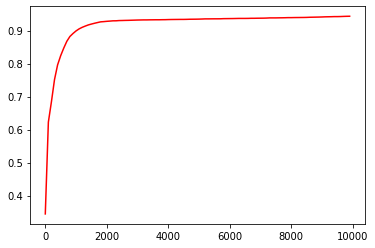

In [94]:
blue_index = np.where(np.array(prob_est_strong) == 1, True, False)
plt.plot(numbers_of_rvs[::100][blue_index], prob_est_strong[blue_index], color = 'blue')
plt.plot(numbers_of_rvs[::100][~blue_index], prob_est_strong[~blue_index], color = 'red')
# plt.ylim(0.98,1.01)
# plt.hlines(y = 1, color = color_list, xmin = numbers_of_rvs[::100].min(), xmax = numbers_of_rvs[::100].max())

# compare different estimator
https://stats.stackexchange.com/questions/321659/how-to-prove-that-one-mean-estimator-converges-faster-than-another

In [16]:
def ext_est(x):
    return (min(x) + max(x))/2

In [17]:
sample = stats.uniform.rvs(0,10,size = (1000,10000)) # 1000 sample, 10000 times simulation

In [18]:
# unbiasness checked through 10000 simulations
sample.mean(axis = 0).mean(),np.median(sample, axis = 0).mean(),np.apply_along_axis(ext_est, 0 ,sample).mean()

(4.999941534728099, 4.999593707791259, 4.999970928435073)

In [19]:
# sd comparation through 10000 simulations
sample.mean(axis = 0).std(),np.median(sample, axis = 0).std(),np.apply_along_axis(ext_est, 0 ,sample).std()

(0.09101124553210192, 0.1573245606751655, 0.007009158621117756)